In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\Titanic-Dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(data.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [6]:
print(data.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [7]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [11]:
data.drop('Cabin',axis=1,inplace=True)

In [12]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data['Sex'].map({'male':0,'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [15]:
data=pd.get_dummies(data,columns=['Embarked'],drop_first=True)

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,False,False


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
data[['Age','Fare']]=scaler.fit_transform(data[['Age','Fare']])

In [20]:
import seaborn as sb

In [21]:
import matplotlib.pyplot as plt

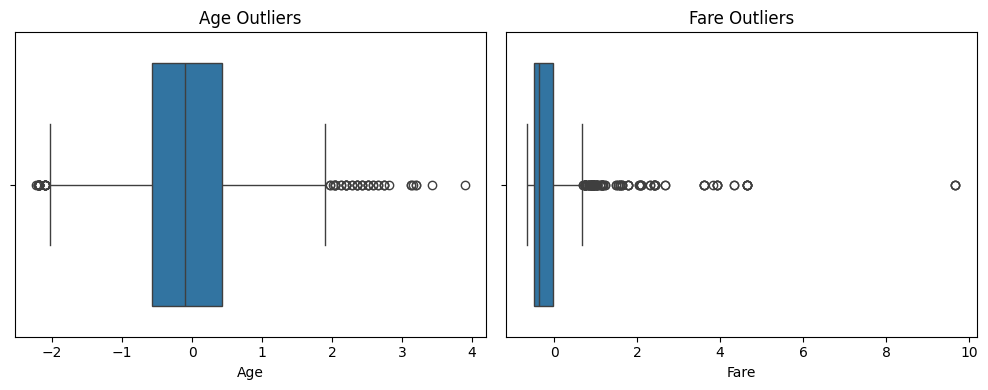

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.boxplot(x=data['Age'])
plt.title('Age Outliers')
plt.subplot(1,2,2)
sb.boxplot(x=data['Fare'])
plt.title('Fare Outliers')
plt.tight_layout()
plt.show()

In [23]:
def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return df[(df[column]>=lower)&(df[column]<=upper)]

data=remove_outliers(data,'Age')
data=remove_outliers(data,'Fare')
    

In [24]:
print('shape after outlier removal',data.shape)

shape after outlier removal (718, 12)


In [25]:
print(data[['Age','Fare']].describe())

              Age        Fare
count  718.000000  718.000000
mean    -0.098537   -0.302242
std      0.769449    0.266674
min     -2.025883   -0.648422
25%     -0.565736   -0.489568
50%     -0.104637   -0.411839
75%      0.270006   -0.126366
max      1.893459    0.587429


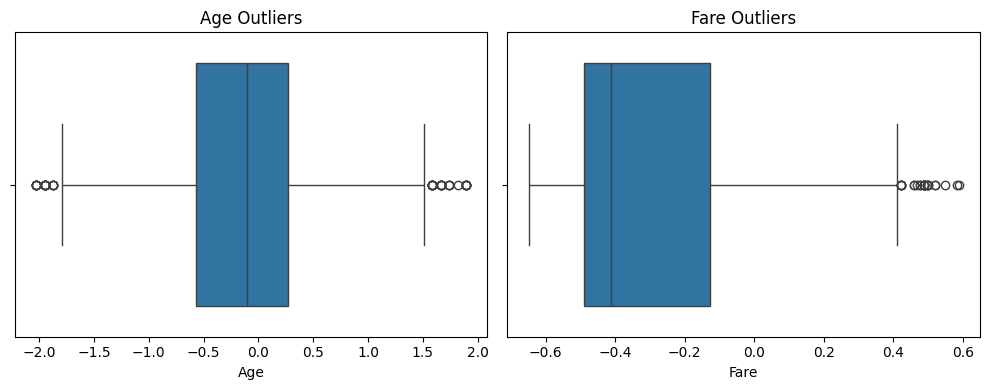

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.boxplot(x=data['Age'])
plt.title('Age Outliers')
plt.subplot(1,2,2)
sb.boxplot(x=data['Fare'])
plt.title('Fare Outliers')
plt.tight_layout()
plt.show()

In [27]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex       Age  SibSp  \
0                       Braund, Mr. Owen Harris    male -0.565736      1   
2                        Heikkinen, Miss. Laina  female -0.258337      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.433312      1   
4                      Allen, Mr. William Henry    male  0.433312      0   
5                              Moran, Mr. James    male -0.104637      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
2      0  STON/O2. 3101282 -0.488854       False        True  
3      0            113803  0.420730       False        True  
4      0            373450 -0.486337       False        True  
5      0   